In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from scipy.stats import shapiro,kstest,normaltest
import pickle


## Problem Stetement

In [14]:
#To predict admission chances

## Data Gathering

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.drop("Serial No.",axis = 1,inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: xlabel='TOEFL Score', ylabel='Density'>

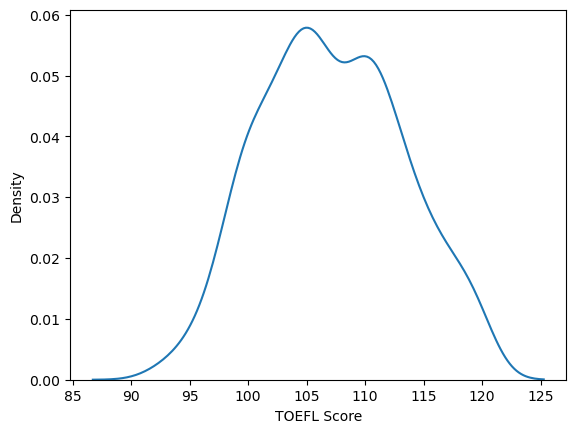

In [8]:
sns.kdeplot(df['TOEFL Score'])

In [9]:
df["TOEFL Score"].skew()

0.09560097235726285

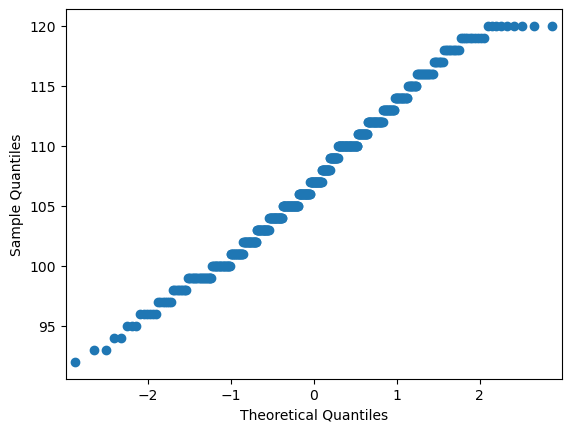

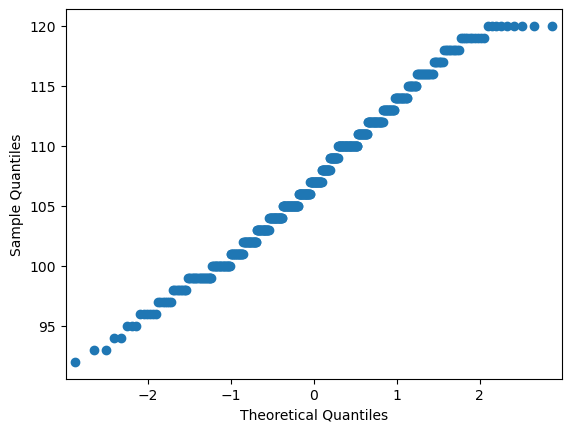

In [10]:
sm.qqplot(df["TOEFL Score"])

<Axes: >

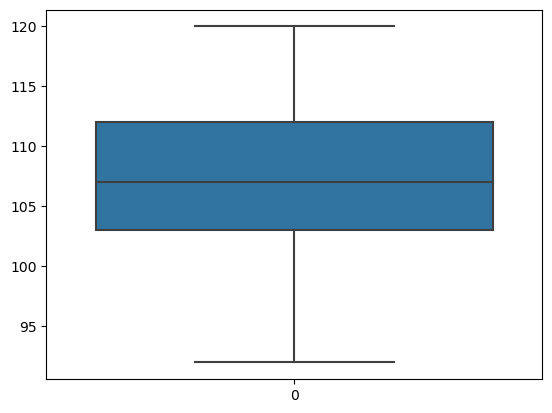

In [11]:
sns.boxplot(df["TOEFL Score"])

In [12]:
stat,p_val = shapiro(df["TOEFL Score"])
print(p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis is True")
    
else:
    print("Data is Not Normally Distributed")
    print("Null Hypothesis is false")
    

8.730924309929833e-05
Data is Not Normally Distributed
Null Hypothesis is false


## linearity

In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [14]:
df.var()

GRE Score            127.580377
TOEFL Score           36.989114
University Rating      1.307619
SOP                    0.982088
LOR                    0.856457
CGPA                   0.365799
Research               0.246894
Chance of Admit        0.019921
dtype: float64

<Axes: >

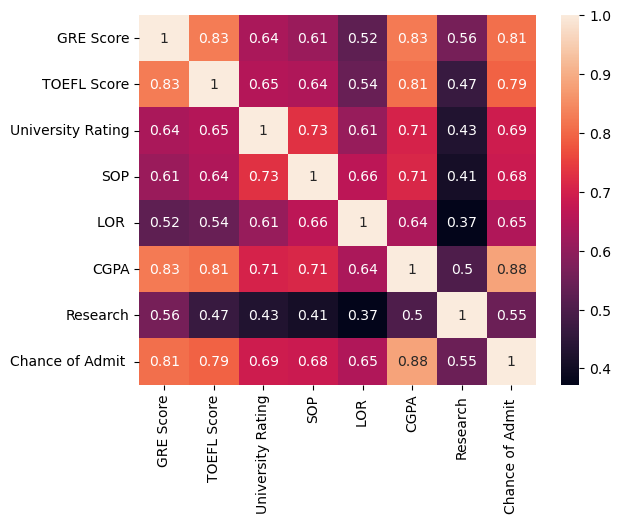

In [15]:
sns.heatmap(df.corr(),annot = True)

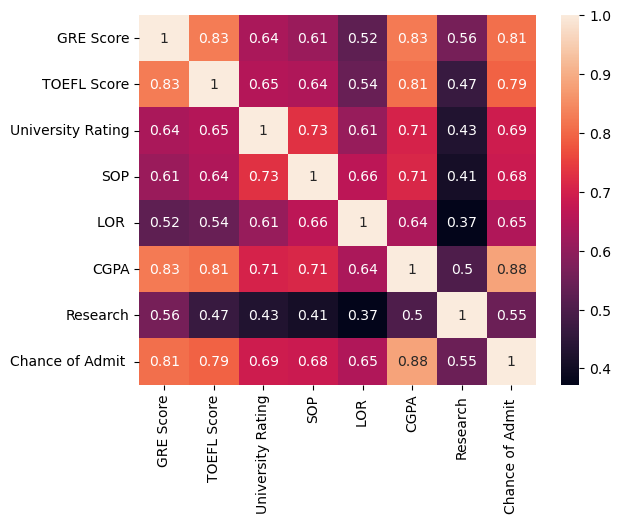

In [16]:
sns.heatmap(df.corr(),annot = True)
plt.savefig("Admission corr.png")

In [17]:
corr_target = df.corr().head(1)
corr_target 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.0,0.8272,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351


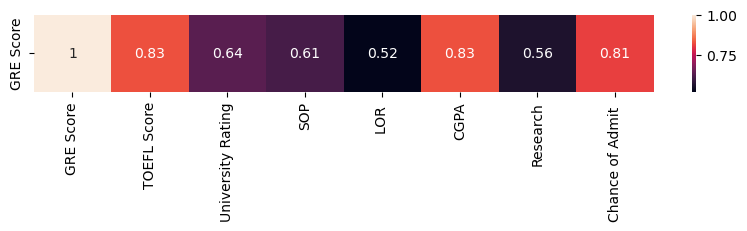

In [18]:
plt.figure(figsize = (10,1))
sns.heatmap(corr_target,annot = True)
plt.savefig("Admission corr.png")

## Assumptions(NoMulticolinearity)

In [19]:
df.shape

(500, 8)

In [20]:
df.shape[1]

8

In [21]:
vif_list = []
for i in range(df.shape[1] - 1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f"Vif of {df.columns[i]} is >>",vif)
    vif_list.append(vif)

Vif of GRE Score is >> 1504.894809819234
Vif of TOEFL Score is >> 1243.5023702219323
Vif of University Rating is >> 21.590945361773844
Vif of SOP is >> 35.444504213092884
Vif of LOR  is >> 31.73387111365384
Vif of CGPA is >> 1238.0957552630935
Vif of Research is >> 3.2512997969491497


In [22]:
vif_list

[1504.894809819234,
 1243.5023702219323,
 21.590945361773844,
 35.444504213092884,
 31.73387111365384,
 1238.0957552630935,
 3.2512997969491497]

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
x = df.drop("Chance of Admit ",axis = 1)
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

<Axes: >

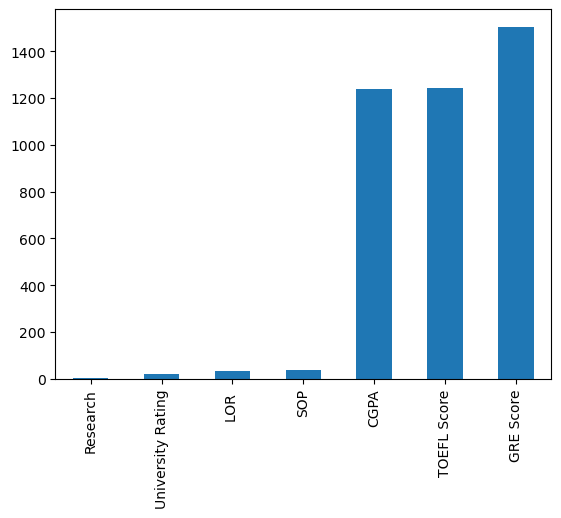

In [25]:
s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind = "bar")

<Axes: >

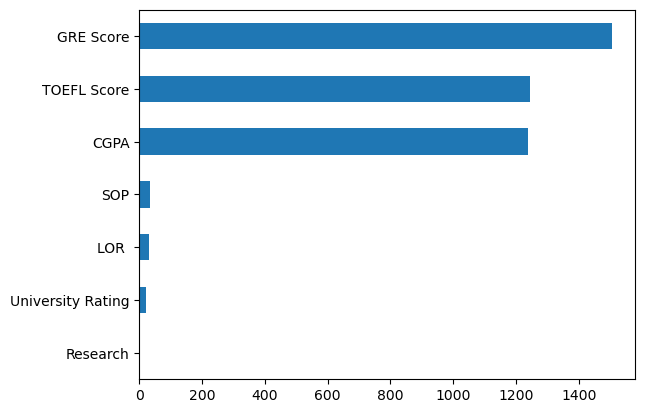

In [26]:
s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind = "barh")

## Model Training

In [27]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [28]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
x = df.drop("Chance of Admit ",axis = 1)

In [30]:
y = df["Chance of Admit "]

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=5)


In [32]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
247,311,104,2,2.5,3.5,8.48,0
390,314,102,2,2.0,2.5,8.24,0
186,317,107,3,3.5,3.0,8.68,1
484,317,106,3,3.5,3.0,7.89,1
139,318,109,1,3.5,3.5,9.12,0
...,...,...,...,...,...,...,...
486,319,102,3,2.5,2.5,8.37,0
189,324,112,5,5.0,5.0,9.08,1
495,332,108,5,4.5,4.0,9.02,1
206,315,99,2,3.5,3.0,7.89,0


In [33]:
y_train

247    0.71
390    0.64
186    0.84
484    0.73
139    0.78
       ... 
486    0.68
189    0.88
495    0.87
206    0.63
355    0.73
Name: Chance of Admit , Length: 400, dtype: float64

In [34]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
241,317,103,2,2.5,2.0,8.15,0
448,312,109,2,2.5,4.0,9.02,0
75,329,114,2,2.0,4.0,8.56,1
212,338,120,4,5.0,5.0,9.66,1
481,323,107,4,3.0,2.5,8.48,1
...,...,...,...,...,...,...,...
145,320,113,2,2.0,2.5,8.64,1
234,330,113,5,5.0,4.0,9.31,1
382,324,110,4,4.5,4.0,9.15,1
141,332,118,2,4.5,3.5,9.36,1


In [35]:
y_test

241    0.65
448    0.80
75     0.72
212    0.95
481    0.78
       ... 
145    0.81
234    0.91
382    0.82
141    0.90
140    0.84
Name: Chance of Admit , Length: 100, dtype: float64

## create instance

In [36]:
model = LinearRegression()
model

LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
model.coef_

array([ 0.00177491,  0.00267208,  0.00698668, -0.00051509,  0.01668673,
        0.12516321,  0.02372516])

In [39]:
model.intercept_

-1.293446359901378

## Model Evaluation

In [52]:
#now i can check my model will perform well or not

In [40]:
y_predict = model.predict(x_test)
y_predict[0:10]

array([0.61056466, 0.75998806, 0.76992962, 0.96873068, 0.71899068,
       0.7216282 , 0.62068633, 0.69473526, 0.64140404, 0.77613098])

In [41]:
y_test[0:10]

241    0.65
448    0.80
75     0.72
212    0.95
481    0.78
280    0.68
474    0.67
269    0.77
40     0.46
222    0.76
Name: Chance of Admit , dtype: float64

## Model Evaluation

In [42]:
residual = y_test - y_predict

In [43]:
residual

241    0.039435
448    0.040012
75    -0.049930
212   -0.018731
481    0.061009
         ...   
145    0.073734
234    0.027680
382   -0.016899
141    0.023558
140    0.024629
Name: Chance of Admit , Length: 100, dtype: float64

## Evaluation on testing data

In [44]:
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error is :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print()

mae = mean_absolute_error(y_test,y_predict)
print("Mean Absolute Error is :",mae)
print()

r_squared = r2_score(y_test,y_predict)
print("R score is :",r_squared)


Mean Squared Error is : 0.0029189993928211895

Root Mean Squared Error: 0.05402776501782384

Mean Absolute Error is : 0.041734986670920626

R score is : 0.8214787365889656


In [45]:
r_squared = model.score(x_test,y_test)
r_squared

0.8214787365889656

## Evaluation on Training data

In [46]:
y_pred_train = model.predict(x_train)
len(y_pred_train)
y_pred_train[0:6]

array([0.66892123, 0.62243344, 0.73447298, 0.63292196, 0.76730871,
       0.93967237])

In [47]:
y_train[0:6]

247    0.71
390    0.64
186    0.84
484    0.73
139    0.78
47     0.89
Name: Chance of Admit , dtype: float64

In [48]:
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error is :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print()

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error is :",mae)
print()

r_squared = r2_score(y_train,y_pred_train)
print("R score is :",r_squared)


Mean Squared Error is : 0.0037098772519766885

Root Mean Squared Error: 0.06090876170122562

Mean Absolute Error is : 0.04337156274250587

R score is : 0.8211364094801954


In [49]:
b = x_test.iloc[5]
b

GRE Score            311.00
TOEFL Score          102.00
University Rating      3.00
SOP                    4.50
LOR                    4.00
CGPA                   8.64
Research               1.00
Name: 280, dtype: float64

In [50]:
y_predict_new2 = model.predict([b])
y_predict_new2

array([0.7216282])

In [64]:
#now check remaining two assumption


## Normality of residual

In [51]:
y_train[0:10]  #actual values for training data

247    0.71
390    0.64
186    0.84
484    0.73
139    0.78
47     0.89
9      0.45
278    0.66
336    0.72
302    0.65
Name: Chance of Admit , dtype: float64

In [52]:
y_pred_train[0:10] #y_prddicted values

array([0.66892123, 0.62243344, 0.73447298, 0.63292196, 0.76730871,
       0.93967237, 0.71405632, 0.66191849, 0.72799603, 0.7024867 ])

In [53]:
residual = y_train - y_pred_train
residual

247    0.041079
390    0.017567
186    0.105527
484    0.097078
139    0.012691
         ...   
486    0.025692
189    0.023103
495    0.033531
206    0.050044
355    0.089886
Name: Chance of Admit , Length: 400, dtype: float64

### check by using kde plot


<Axes: xlabel='Chance of Admit ', ylabel='Density'>

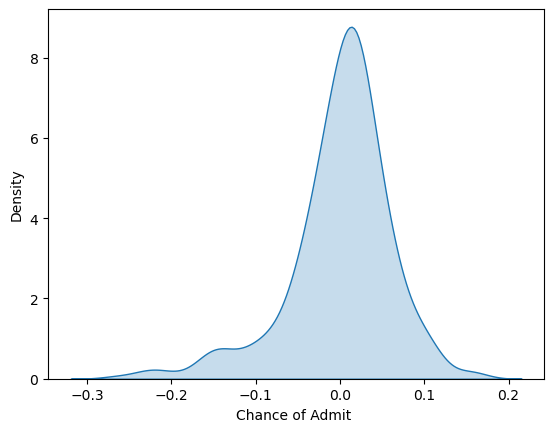

In [54]:
sns.kdeplot(residual,fill =True)

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

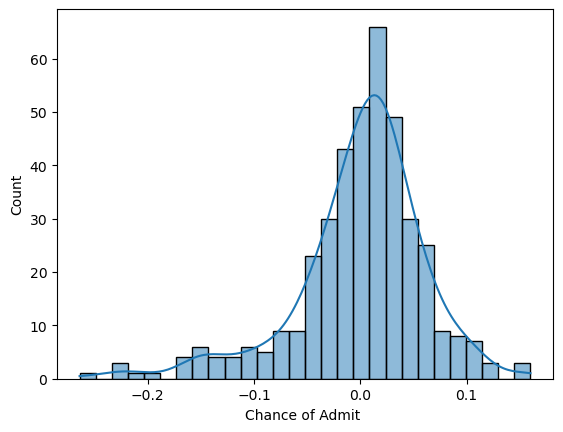

In [55]:
sns.histplot(residual,fill = True,kde = True)

## 2.QQ plot

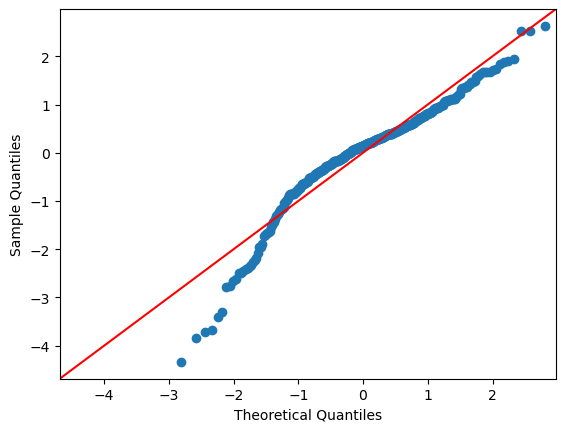

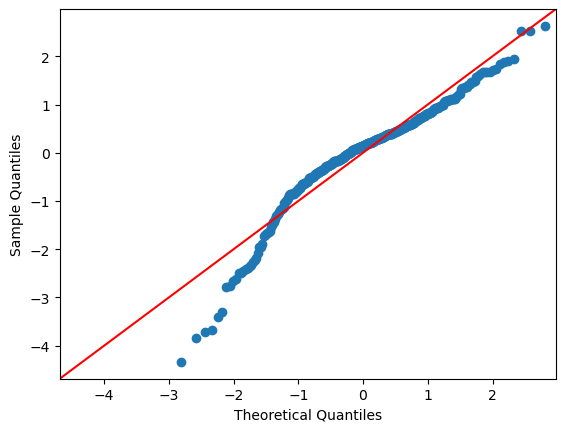

In [56]:
sm.qqplot(residual,line = "45",fit = True)

<Axes: ylabel='Count'>

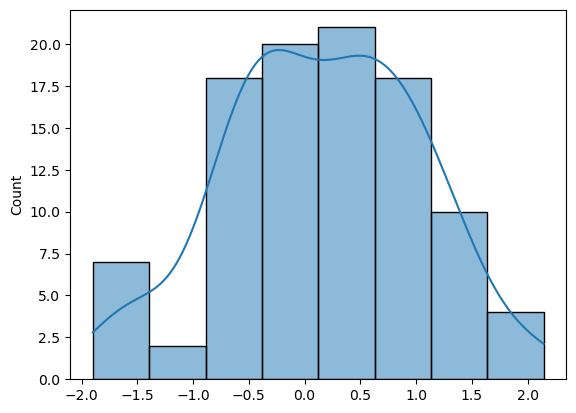

In [57]:
array = np.random.randn(100)
sns.histplot(array,kde = True)

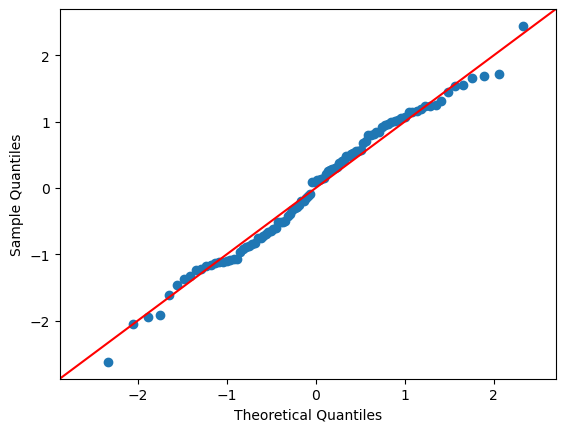

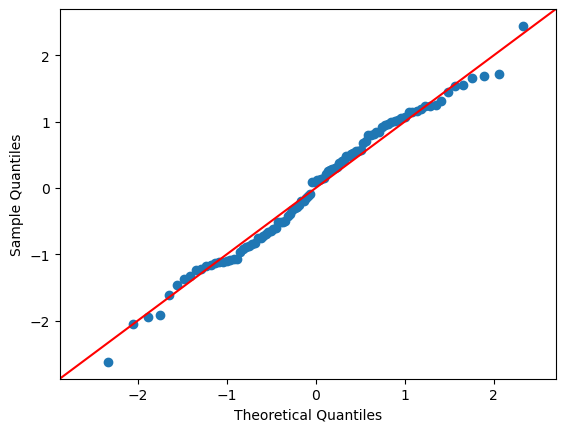

In [72]:
sm.qqplot(array,line = "45",fit = True)

## 3.Hypothesis Testing

In [58]:
stat,p_val = shapiro(residual)
print(p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypothesis is True")
    
else:
    print("Data is Not Normally Distributed")
    print("Null Hypothesis is false")
    

6.649724174079275e-13
Data is Not Normally Distributed
Null Hypothesis is false


## 4.Homoscedicity

<Axes: xlabel='Chance of Admit ', ylabel='Chance of Admit '>

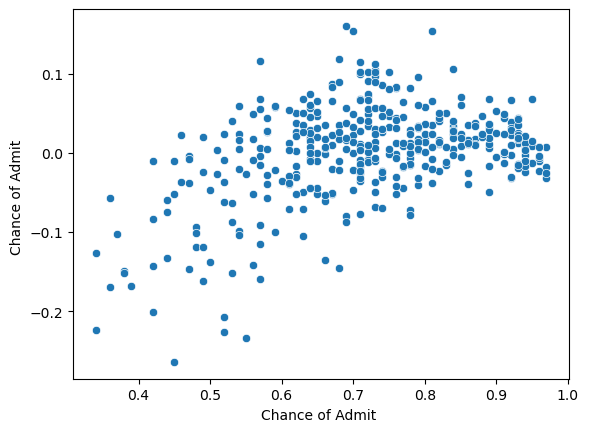

In [59]:
sns.scatterplot(x =y_train, y = residual )

In [60]:
x_test.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [61]:
x_test.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
241,317,103,2,2.5,2.0,8.15,0


In [62]:
x_test.head(1).T

,241
GRE Score,317.00
TOEFL Score,103.00
University Rating,2.00
SOP,2.50
LOR,2.00
CGPA,8.15
Research,0.00


## Testing model on User Input

In [63]:
a = x_train.iloc[5]
a

GRE Score            339.0
TOEFL Score          119.0
University Rating      5.0
SOP                    4.5
LOR                    4.0
CGPA                   9.7
Research               0.0
Name: 47, dtype: float64

In [64]:
y_predict_new = model.predict([a])
y_predict_new

array([0.93967237])

In [65]:
y_test.iloc[5]  #actual output

0.68

In [66]:
row_10 = x_train.iloc[10]
row_10

GRE Score            290.00
TOEFL Score          104.00
University Rating      4.00
SOP                    2.00
LOR                    2.50
CGPA                   7.46
Research               0.00
Name: 117, dtype: float64

In [67]:
row_10 = model.predict([row_10])
print("Predicted chance for admission is",row_10)

Predicted chance for admission is [0.50152579]


In [68]:
y_test.iloc[10]

0.64

In [69]:
with open("Admission_model.pkl","wb") as f:
    pickle.dump(model,f)

In [70]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [71]:
project_data = {"columns" :list(x.columns)}

In [72]:
project_data

{'columns': ['GRE Score',
  'TOEFL Score',
  'University Rating',
  'SOP',
  'LOR ',
  'CGPA',
  'Research']}

In [73]:
import json

In [74]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)